## FUZZY C MEANS

## Pengertian Fuzzy C Means

Fuzzy C-Means adalah sebuah algoritma clustering yang bertujuan mengelompokan titik-titik data berdasarkan kemiripannya. Bedanya dengan clustering biasa seperti K-means, FCM memungkinkan satu titik data untuk menjadi anggota beberapa kelompok sekaligus tapi dengan derajat keanggotaan yang berbeda-beda antara 0 sampai 1. Ini sangat berguna untuk data yang abu-abu atau punya karakteristika mirip dengan lebih dari satu kelompok

## Konsep Kunci

Ada dua elemen utama yang terus diperbarui dalam FCM:

- Centroid: ini adalah titik pusat atau wakil dari setiap kelomook. Letaknya bukan harus titik data sungguhan, tapi hasil rata-rata tertimbang dari semua data yang cenderung masuk ke kelompok tersebut

- Matrik Keanggotaan: ini adalah tabel yang menunjukan seberapa mirip setiap titik data dengan setiap centroid. Setiap nilai dalam matriks ini adalah derajat keanggotaan antara 0 dan 1 dan total keanggotaan sebuah titik data ke semua kelompok selalu 1

## Cara Kerja

FCM bekerja secara berulang hingga menemukan solusi yang stabil:

1. Insialisasi awal: algoritma memulai dengan matriks keanggotaan acak atau centroid awal
2. Perhitungan centroid: menggunakan matriks keanggotaan saat ini, centroid baru dihitung. Data dengan keanggotaan tinggi ke suatu kelompok akan lebih menarik centroid kelompok tersebut.
3. Pembaruan matriks keanggotaan: dengan centroid yang baru, setiap titik data sekarang menghitung ulang seberapa dekatnya ia dengan setiap centroid. Semakin dekat, semakin tinggi keanggotaanya ke kelompok tersebut
4. Konvergensi: langkah 2 dan 3 diulang terus sampai centroid tidak banyak bergeser lagi/perubhaan keanggotaanya sudah sangat kecil menandakan bahwa algoritma telah menemukan kelompok yang stabil

## Parameter Penting: Fuzziness

Parameter m umumnya 2 adalah kunci dalam FCM, Ini mengontrol seberapa kabur/lunak batas antar kelompok

- m besar: batas kelompok menjadi lebih lunak dan keanggotaan titik data cenderung lebih merata di beberapa kelompok misalnya banyak nilai 0.5

- m kecil (mendekati 1): batas kelompok menjadi lebih tegas dan keanggotaan akan cenderung mendekati 0/1, mirip dengan hard clustering

FCM memberikan pemahaman yang lebih kaya tentang struktur data, karena tidak memaksa setiap data untuk hanya masuk ke satu kelompok saja

## Langkah Algoritma

1. Inisialisasi jumlah cluster C, nilai m dan matriks keanggotaan U
2. Iterasi sampai konvergen:
  - hitung pusat cluster c
  - update matriks keanggotaan Uij
  - hitung fungsi objektif
3. Update derajat keanggotaan

In [ ]:
import numpy as np

# Data 4 titik 2 dimensi
X = np.array([
    [1.0, 2.0],  # x1
    [2.0, 3.0],  # x2
    [3.0, 4.0],  # x3
    [6.0, 7.0],   # x4
    [7.0, 8.0]
])

# Matriks keanggotaan awal (u) untuk iterasi pertama
u = np.array([
    [0.5, 0.5],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.7, 0.3],
    [0.6, 0.4]
])

m = 2  # fuzziness

def hitung_centroid(X, u, m):
    c1_num = np.zeros(X.shape[1])
    c1_den = 0
    print(">>> Menghitung centroid cluster 1 (c1):")
    for i in range(len(X)):
        u_ij_m = u[i, 0] ** m
        print(f"  u_{i+1}1^{m} * x_{i+1} = {u[i,0]}^{m} * {X[i]} = {u_ij_m} * {X[i]} = {u_ij_m * X[i]}")
        c1_num += u_ij_m * X[i]
        c1_den += u_ij_m
    c1 = c1_num / c1_den
    print(f"  Numerator c1 = {c1_num}")
    print(f"  Denominator c1 = {c1_den}")
    print(f"  Centroid c1 = {c1}\n")

    c2_num = np.zeros(X.shape[1])
    c2_den = 0
    print(">>> Menghitung centroid cluster 2 (c2):")
    for i in range(len(X)):
        u_ij_m = u[i, 1] ** m
        print(f"  u_{i+1}2^{m} * x_{i+1} = {u[i,1]}^{m} * {X[i]} = {u_ij_m} * {X[i]} = {u_ij_m * X[i]}")
        c2_num += u_ij_m * X[i]
        c2_den += u_ij_m
    c2 = c2_num / c2_den
    print(f"  Numerator c2 = {c2_num}")
    print(f"  Denominator c2 = {c2_den}")
    print(f"  Centroid c2 = {c2}\n")

    return c1, c2


# =================== ITERASI 1 ====================
print("===== ITERASI 1 =====\n")
centroids_iter1 = hitung_centroid(X, u, m)
u_iter2 = perbarui_keanggotaan(X, centroids_iter1, m)

# =================== ITERASI 2 ====================
print("\n===== ITERASI 2 =====\n")
centroids_iter2 = hitung_centroid(X, u_iter2, m)
u_iter3 = perbarui_keanggotaan(X, centroids_iter2, m)


===== ITERASI 1 =====

>>> Menghitung centroid cluster 1 (c1):
  u_11^2 * x_1 = 0.5^2 * [1. 2.] = 0.25 * [1. 2.] = [0.25 0.5 ]
  u_21^2 * x_2 = 0.7^2 * [2. 3.] = 0.48999999999999994 * [2. 3.] = [0.98 1.47]
  u_31^2 * x_3 = 0.8^2 * [3. 4.] = 0.6400000000000001 * [3. 4.] = [1.92 2.56]
  u_41^2 * x_4 = 0.7^2 * [6. 7.] = 0.48999999999999994 * [6. 7.] = [2.94 3.43]
  u_51^2 * x_5 = 0.6^2 * [7. 8.] = 0.36 * [7. 8.] = [2.52 2.88]
  Numerator c1 = [ 8.61 10.84]
  Denominator c1 = 2.23
  Centroid c1 = [3.86098655 4.86098655]

>>> Menghitung centroid cluster 2 (c2):
  u_12^2 * x_1 = 0.5^2 * [1. 2.] = 0.25 * [1. 2.] = [0.25 0.5 ]
  u_22^2 * x_2 = 0.3^2 * [2. 3.] = 0.09 * [2. 3.] = [0.18 0.27]
  u_32^2 * x_3 = 0.2^2 * [3. 4.] = 0.04000000000000001 * [3. 4.] = [0.12 0.16]
  u_42^2 * x_4 = 0.3^2 * [6. 7.] = 0.09 * [6. 7.] = [0.54 0.63]
  u_52^2 * x_5 = 0.4^2 * [7. 8.] = 0.16000000000000003 * [7. 8.] = [1.12 1.28]
  Numerator c2 = [2.21 2.84]
  Denominator c2 = 0.63
  Centroid c2 = [3.50793651 4.5079

In [ ]:
import numpy as np

# Data 5 titik 2 dimensi
X = np.array([
    [1.0, 2.0],
    [2.0, 3.0],
    [3.0, 4.0],
    [6.0, 7.0],
    [7.0, 8.0]
])

# Matriks keanggotaan awal (u)
u = np.array([
    [0.5, 0.5],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.7, 0.3],
    [0.6, 0.4]
])

m = 2  # fuzziness
epsilon = 1e-4  # toleransi konvergensi

def hitung_centroid(X, u, m, iter_ke):
    c1_num = np.zeros(X.shape[1])
    c1_den = 0
    print(f"Menghitung centroid cluster 1 (c1):")
    for i in range(len(X)):
        u_ij_m = u[i, 0] ** m
        print(f"  u_{i+1}1^{m} * x_{i+1} = {u[i,0]}^{m} * {X[i]} = {u_ij_m} * {X[i]} = {u_ij_m * X[i]}")
        c1_num += u_ij_m * X[i]
        c1_den += u_ij_m
    c1 = c1_num / c1_den
    print(f"  Centroid c1 = {c1}")

    c2_num = np.zeros(X.shape[1])
    c2_den = 0
    print(f"Menghitung centroid cluster 2 (c2):")
    for i in range(len(X)):
        u_ij_m = u[i, 1] ** m
        print(f"  u_{i+1}2^{m} * x_{i+1} = {u[i,1]}^{m} * {X[i]} = {u_ij_m} * {X[i]} = {u_ij_m * X[i]}")
        c2_num += u_ij_m * X[i]
        c2_den += u_ij_m
    c2 = c2_num / c2_den
    print(f"  Centroid c2 = {c2}")

    return c1, c2

def perbarui_keanggotaan(X, centroids, m):
    c1, c2 = centroids
    u_baru = np.zeros((len(X), 2))
    for i in range(len(X)):
        for j, c in enumerate([c1, c2]):
            dist_ij = np.linalg.norm(X[i] - c)
            denom = sum([
                (dist_ij / np.linalg.norm(X[i] - ck)) ** (2 / (m - 1))
                for ck in [c1, c2]
            ])
            u_baru[i, j] = 1 / denom
    return u_baru

def jarak_centroid(c_old, c_new):
    return np.linalg.norm(c_old[0] - c_new[0]) + np.linalg.norm(c_old[1] - c_new[1])

# ==================== PROSES ITERASI SAMPAI KONVERGEN ====================
maks_iterasi = 100
iterasi = 1

while True:
    print(f"\n================== ITERASI {iterasi} ==================")
    centroids_baru = hitung_centroid(X, u, m, iterasi)
    if iterasi > 1:
        delta = jarak_centroid(centroids_lama, centroids_baru)
        print(f"\n>>> Perubahan centroid = {delta}")
        if delta < epsilon:
            print("\n>>> Konvergen! Iterasi dihentikan.")
            break
    centroids_lama = centroids_baru
    u = perbarui_keanggotaan(X, centroids_baru, m)
    iterasi += 1
    if iterasi > maks_iterasi:
        print("\n>>> Mencapai batas maksimum iterasi.")
        break



================== ITERASI 1 ==================
Menghitung centroid cluster 1 (c1):
  u_11^2 * x_1 = 0.5^2 * [1. 2.] = 0.25 * [1. 2.] = [0.25 0.5 ]
  u_21^2 * x_2 = 0.7^2 * [2. 3.] = 0.48999999999999994 * [2. 3.] = [0.98 1.47]
  u_31^2 * x_3 = 0.8^2 * [3. 4.] = 0.6400000000000001 * [3. 4.] = [1.92 2.56]
  u_41^2 * x_4 = 0.7^2 * [6. 7.] = 0.48999999999999994 * [6. 7.] = [2.94 3.43]
  u_51^2 * x_5 = 0.6^2 * [7. 8.] = 0.36 * [7. 8.] = [2.52 2.88]
  Centroid c1 = [3.86098655 4.86098655]
Menghitung centroid cluster 2 (c2):
  u_12^2 * x_1 = 0.5^2 * [1. 2.] = 0.25 * [1. 2.] = [0.25 0.5 ]
  u_22^2 * x_2 = 0.3^2 * [2. 3.] = 0.09 * [2. 3.] = [0.18 0.27]
  u_32^2 * x_3 = 0.2^2 * [3. 4.] = 0.04000000000000001 * [3. 4.] = [0.12 0.16]
  u_42^2 * x_4 = 0.3^2 * [6. 7.] = 0.09 * [6. 7.] = [0.54 0.63]
  u_52^2 * x_5 = 0.4^2 * [7. 8.] = 0.16000000000000003 * [7. 8.] = [1.12 1.28]
  Centroid c2 = [3.50793651 4.50793651]

================== ITERASI 2 ==================
Menghitung centroid cluster 1 (c1):


In [ ]:
def perbarui_keanggotaan(X, centroids, m):
    c1, c2 = centroids
    u_baru = np.zeros((len(X), 2))
    print(">>> Memperbarui matriks keanggotaan u:")
    for i in range(len(X)):
        for j, c in enumerate([c1, c2]):
            numerator = np.linalg.norm(X[i] - c)
            denom = 0
            print(f"\n  Untuk data x{i+1} dan cluster c{j+1}:")
            print(f"    Jarak numerator ||x{i+1} - v{j+1}|| = {numerator}")
            for k, ck in enumerate([c1, c2]):
                jarak = np.linalg.norm(X[i] - ck)
                rasio = (numerator / jarak) ** (2 / (m - 1))
                denom += rasio
                print(f"    (||x{i+1} - v{j+1}|| / ||x{i+1} - v{k+1}||)^{2} = ({numerator:.6f} / {jarak:.6f})^2 = {rasio:.6f}")
            u_baru[i, j] = 1 / denom
            print(f"    u_{i+1}{j+1} = 1 / {denom:.6f} = {u_baru[i, j]:.6f}")
    return u_baru

print("===== ITERASI 1 =====\n")
u_iter2 = perbarui_keanggotaan(X, centroids_iter1, m)

print("\n===== ITERASI 2 =====\n")
u_iter3 = perbarui_keanggotaan(X, centroids_iter2, m)



===== ITERASI 1 =====

>>> Memperbarui matriks keanggotaan u:

  Untuk data x1 dan cluster c1:
    Jarak numerator ||x1 - v1|| = 4.046045976654863
    (||x1 - v1|| / ||x1 - v1||)^2 = (4.046046 / 4.046046)^2 = 1.000000
    (||x1 - v1|| / ||x1 - v2||)^2 = (4.046046 / 3.546758)^2 = 1.301363
    u_11 = 1 / 2.301363 = 0.434525

  Untuk data x1 dan cluster c2:
    Jarak numerator ||x1 - v2|| = 3.5467578230944294
    (||x1 - v2|| / ||x1 - v1||)^2 = (3.546758 / 4.046046)^2 = 0.768425
    (||x1 - v2|| / ||x1 - v2||)^2 = (3.546758 / 3.546758)^2 = 1.000000
    u_12 = 1 / 1.768425 = 0.565475

  Untuk data x2 dan cluster c1:
    Jarak numerator ||x2 - v1|| = 2.6318324142817686
    (||x2 - v1|| / ||x2 - v1||)^2 = (2.631832 / 2.631832)^2 = 1.000000
    (||x2 - v1|| / ||x2 - v2||)^2 = (2.631832 / 2.132544)^2 = 1.523072
    u_21 = 1 / 2.523072 = 0.396342

  Untuk data x2 dan cluster c2:
    Jarak numerator ||x2 - v2|| = 2.1325442607213345
    (||x2 - v2|| / ||x2 - v1||)^2 = (2.132544 / 2.631832)^2 = 0.

In [ ]:
import numpy as np

# --- 1. Data dan Parameter Awal ---
# Data 5 titik 2 dimensi (sesuai permintaan)
X = np.array([
    [1.0, 2.0],  # x1
    [2.0, 3.0],  # x2
    [3.0, 4.0],  # x3
    [6.0, 7.0],  # x4
    [7.0, 8.0]   # x5
])

# Matriks keanggotaan awal (u) (sesuai permintaan)
u = np.array([
    [0.5, 0.5],
    [0.7, 0.3],
    [0.8, 0.2],
    [0.7, 0.3],
    [0.6, 0.4]
])

# Menentukan jumlah cluster (C) dari bentuk matriks keanggotaan awal
C = u.shape[1]
m = 2  # Parameter fuzziness (m). Umumnya 2.

epsilon = 1e-4  # Toleransi konvergensi (0.0001)
maks_iterasi = 100 # Batas iterasi maksimum untuk mencegah infinite loop

print("===== INISIALISASI =====")
print(f"Data (X):\n{X}")
print(f"Jumlah Cluster (C): {C}")
print(f"Parameter Fuzziness (m): {m}")
print(f"Toleransi Konvergensi (epsilon): {epsilon}")
print(f"Matriks Keanggotaan Awal (u):\n{u}\n")

# --- 2. Fungsi-fungsi Inti FCM ---

def hitung_centroid(X, u, m):
    """
    Menghitung centroid (pusat cluster) berdasarkan matriks keanggotaan.
    Rumus: V_j = SUM(u_ij^m * x_i) / SUM(u_ij^m)
    """
    num_data_points = len(X)
    num_dimensions = X.shape[1]
    num_clusters = u.shape[1]
    centroids = np.zeros((num_clusters, num_dimensions))

    print("--- Menghitung Centroid ---")
    for j in range(num_clusters): # Loop untuk setiap cluster
        c_num = np.zeros(num_dimensions)
        c_den = 0
        for i in range(num_data_points): # Loop untuk setiap titik data
            u_ij_m = u[i, j] ** m # u_ij pangkat m
            c_num += u_ij_m * X[i] # Pembilang
            c_den += u_ij_m       # Penyebut

        # Handle division by zero if a cluster has zero membership (unlikely with random init)
        if c_den == 0:
            # Jika penyebut 0, artinya tidak ada titik data yang memiliki keanggotaan ke cluster ini.
            # Kita bisa menginisialisasi ulang centroid ini secara acak, atau membiarkannya 0.
            # Untuk kasus ini, kita biarkan 0 atau bisa juga assign ke titik data random
            centroids[j] = np.zeros(num_dimensions)
        else:
            centroids[j] = c_num / c_den
        print(f"  Centroid c{j+1} = {centroids[j]}")
    return centroids

def perbarui_keanggotaan(X, centroids, m):
    """
    Memperbarui matriks keanggotaan berdasarkan centroid yang baru.
    Rumus: u_ij = 1 / SUM_k((||x_i - V_j|| / ||x_i - V_k||)^(2/(m-1)))
    """
    num_data_points = len(X)
    num_clusters = centroids.shape[0]
    u_baru = np.zeros((num_data_points, num_clusters))

    print("--- Memperbarui Matriks Keanggotaan ---")
    for i in range(num_data_points): # Loop untuk setiap titik data
        for j in range(num_clusters): # Loop untuk setiap cluster (untuk u_ij)
            numerator_dist = np.linalg.norm(X[i] - centroids[j]) # Jarak ||x_i - V_j||

            denom_sum = 0
            for k in range(num_clusters): # Loop untuk setiap cluster (untuk bagian penyebut)
                dist_to_ck = np.linalg.norm(X[i] - centroids[k]) # Jarak ||x_i - V_k||

                # Menangani kasus khusus: jarak nol
                if dist_to_ck == 0:
                    # Jika titik data persis berada di centroid 'k', maka keanggotaannya ke 'k' adalah 1,
                    # dan ke cluster lain adalah 0. Ini adalah pengecualian pada rumus umum FCM.
                    if numerator_dist == 0: # Ini berarti j == k (titik data persis di centroid cluster j)
                        u_baru[i, j] = 1.0
                        denom_sum = 1.0 # Pastikan denominator tidak 0 agar tidak mempengaruhi hitungan ini
                        break # Keluar dari loop k karena keanggotaan untuk x[i] sudah ditentukan
                    else:
                        # Jika dist_to_ck == 0 tapi numerator_dist != 0, artinya x[i] sama persis
                        # dengan centroid k (cluster lain), sehingga u_ij ini harus 0.
                        # Untuk menghindari ZeroDivisionError, dist_to_ck diatur ke nilai sangat kecil.
                        dist_to_ck = np.finfo(float).eps

                # Hitung rasio pangkat (2/(m-1))
                power_val = 2 / (m - 1)
                ratio = (numerator_dist / dist_to_ck) ** power_val
                denom_sum += ratio

            # Hitung u_ij
            if denom_sum == 0: # Ini bisa terjadi jika semua dist_to_ck adalah 0 (semua centroid sama dengan X[i])
                u_baru[i, j] = 1.0 / num_clusters # Bagikan rata jika semua sama
            else:
                u_baru[i, j] = 1 / denom_sum

    # Pastikan total keanggotaan setiap baris adalah 1 karena potensi floating point error
    u_baru_normalized = u_baru / np.sum(u_baru, axis=1, keepdims=True)
    return u_baru_normalized

def hitung_konvergensi(centroids_lama, centroids_baru):
    """
    Menghitung total perubahan (jarak) antara centroid lama dan centroid baru.
    """
    total_delta = 0.0
    # Asumsi centroids_lama dan centroids_baru memiliki bentuk yang sama (jumlah_cluster, jumlah_dimensi)
    for j in range(centroids_lama.shape[0]):
        total_delta += np.linalg.norm(centroids_lama[j] - centroids_baru[j])
    return total_delta

# --- 3. Proses Iterasi Utama FCM ---
iterasi = 1
centroids_lama = None # Untuk menyimpan centroid dari iterasi sebelumnya
delta_konvergensi = float('inf') # Inisialisasi delta dengan nilai besar agar loop mulai

print("==================== MEMULAI ALGORITMA FUZZY C-MEANS ====================\n")

while iterasi <= maks_iterasi:
    print(f"\n===== ITERASI {iterasi} =====\n")

    # LANGKAH 1: Hitung Centroid Baru
    # 'u' yang digunakan di sini adalah matriks keanggotaan dari akhir iterasi sebelumnya (atau 'u' awal)
    centroids_baru = hitung_centroid(X, u, m)

    # LANGKAH 2: Cek Konvergensi (setelah iterasi pertama)
    if iterasi > 1:
        delta_konvergensi = hitung_konvergensi(centroids_lama, centroids_baru)
        print(f"\n>>> Total perubahan centroid dari iterasi sebelumnya: {delta_konvergensi:.8f}")

        if delta_konvergensi < epsilon:
            print("\n>>> **KONVERGENSI TERCAPAI!** Perubahan centroid di bawah toleransi.")
            break # Hentikan loop karena sudah konvergen

    # Simpan centroid yang baru dihitung untuk perbandingan di iterasi berikutnya
    centroids_lama = centroids_baru

    # LANGKAH 3: Perbarui Matriks Keanggotaan
    # 'u' diperbarui di sini, dan akan digunakan sebagai input untuk iterasi berikutnya
    u = perbarui_keanggotaan(X, centroids_baru, m)

    print(f"\nMatriks Keanggotaan (u) setelah Iterasi {iterasi}:\n{u}\n")

    iterasi += 1

# --- Hasil Akhir ---
print("\n==================== HASIL AKHIR CLUSTERING FUZZY C-MEANS ====================")
print(f"Jumlah Iterasi yang Berjalan: {iterasi-1}")
print(f"Toleransi Konvergensi Epsilon: {epsilon}")
print(f"Perubahan Centroid Terakhir: {delta_konvergensi:.8f}")
print(f"\nCentroid Akhir:\n{centroids_baru}")
print(f"\nMatriks Keanggotaan Akhir (u):\n{u}")

# Untuk melihat penugasan cluster "keras" (opsional, sebagai interpretasi hasil fuzzy)
print("\n--- Penugasan Cluster (Hard Assignment - Jika Diperlukan) ---")
# Setiap titik data dimasukkan ke cluster dengan keanggotaan tertinggi
cluster_assignment = np.argmax(u, axis=1)
for i, assignment in enumerate(cluster_assignment):
    print(f"Data x{i+1} ({X[i]}) paling condong ke Cluster {assignment + 1}")

===== INISIALISASI =====
Data (X):
[[1. 2.]
 [2. 3.]
 [3. 4.]
 [6. 7.]
 [7. 8.]]
Jumlah Cluster (C): 2
Parameter Fuzziness (m): 2
Toleransi Konvergensi (epsilon): 0.0001
Matriks Keanggotaan Awal (u):
[[0.5 0.5]
 [0.7 0.3]
 [0.8 0.2]
 [0.7 0.3]
 [0.6 0.4]]

==================== MEMULAI ALGORITMA FUZZY C-MEANS ====================


===== ITERASI 1 =====

--- Menghitung Centroid ---
  Centroid c1 = [3.86098655 4.86098655]
  Centroid c2 = [3.50793651 4.50793651]
--- Memperbarui Matriks Keanggotaan ---

Matriks Keanggotaan (u) setelah Iterasi 1:
[[0.43452505 0.56547495]
 [0.39634228 0.60365772]
 [0.25818091 0.74181909]
 [0.57579448 0.42420552]
 [0.55309124 0.44690876]]


===== ITERASI 2 =====

--- Menghitung Centroid ---
  Centroid c1 = [4.60336854 5.60336854]
  Centroid c2 = [3.20743845 4.20743845]

>>> Total perubahan centroid dari iterasi sebelumnya: 1.47485511
--- Memperbarui Matriks Keanggotaan ---

Matriks Keanggotaan (u) setelah Iterasi 2:
[[0.27287736 0.72712264]
 [0.1770286  0.822

In [ ]:
!pip install pymysql
!pip install psycopg2-binary
!pip install pandas
!pip install SQLAlchemy pymysql
!pip install scikit-learn
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.7 MB/s eta 0:00:00


In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376
MYSQL_DB = "defaultdb"
MYSQL_USER = "avnadmin"
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query (Ganti 'your_table' dengan nama tabel yang benar)
    cur.execute("SELECT * FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+-----------------+----------------+-----------------+
|     |   id |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | species         |
|-----+------+-----------------+----------------+-----------------+----------------+-----------------|
|   0 |    1 |             5.1 |            3.5 |             1.4 |            0.2 | Iris-setosa     |
|   1 |    2 |             4.9 |            3   |             1.4 |            0.2 | Iris-setosa     |
|   2 |    3 |             4.7 |            3.2 |             1.3 |            0.2 | Iris-setosa     |
|   3 |    4 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa     |
|   4 |    5 |             5   |            3.6 |             1.4 |            0.2 | Iris-setosa     |
|   5 |    6 |             5.4 |            3.9 |             1.7 |            0.4 | Iris-setosa     |
|   6 |    7 |             4.6 |            3.4 |             1.4 |      

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376  # Aiven MySQL biasanya menggunakan port 25060
MYSQL_DB = "defaultdb"  # Ganti dengan nama database Anda
MYSQL_USER = "avnadmin"  # Username dari Aiven.io
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"  # Ganti dengan password dari Aiven.io

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query untuk mengambil data tanpa kolom 'species'
    cur.execute("SELECT sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    data_remove_class = df.to_numpy()  # atau df.values

    # Menampilkan DataFrame tanpa kolom species (kalau ada)
    print("Data tanpa kolom 'species':")
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()


Data tanpa kolom 'species':
+-----+-----------------+----------------+-----------------+----------------+
|     |   sepalLengthCm |   sepalWidthCm |   petalLengthCm |   petalWidthCm |
|-----+-----------------+----------------+-----------------+----------------|
|   0 |             5.1 |            3.5 |             1.4 |            0.2 |
|   1 |             4.9 |            3   |             1.4 |            0.2 |
|   2 |             4.7 |            3.2 |             1.3 |            0.2 |
|   3 |             4.6 |            3.1 |             1.5 |            0.2 |
|   4 |             5   |            3.6 |             1.4 |            0.2 |
|   5 |             5.4 |            3.9 |             1.7 |            0.4 |
|   6 |             4.6 |            3.4 |             1.4 |            0.3 |
|   7 |             5   |            3.4 |             1.5 |            0.2 |
|   8 |             4.4 |            2.9 |             1.4 |            0.2 |
|   9 |             4.9 |           

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Inisialisasi scaler
scaler = StandardScaler()

# Normalisasi data (fit & transform)
data_normalized = scaler.fit_transform(data_remove_class)

# Cek hasil normalisasi
print("Data setelah normalisasi:")
print(data_normalized)


Data setelah normalisasi:
[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1

In [4]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris # Untuk memuat data Iris

# --- 1. Persiapan Data Iris ---
# Memuat dataset Iris dan menormalisasinya.
print("--- Persiapan Data ---")
iris = load_iris()
X_original = iris.data # Data Iris asli

# Normalisasi Data: Penting untuk FCM agar fitur memiliki skala yang seragam.
scaler = StandardScaler()
X = scaler.fit_transform(X_original) # X adalah data yang sudah dinormalisasi, akan jadi input FCM

print("Data Iris asli (5 baris pertama):\n", tabulate(pd.DataFrame(X_original[:5]), headers="keys", tablefmt="psql"))
print("\nData Iris setelah normalisasi (5 baris pertama):\n", tabulate(pd.DataFrame(X[:5]), headers="keys", tablefmt="psql"))
print(f"\nBentuk data input (X): {X.shape}\n")

# --- 2. Parameter FCM ---
NUM_CLUSTERS = 3       # Jumlah cluster yang diinginkan (C)
FUZZINESS_PARAM = 2.0  # Parameter fuzziness (m). m > 1, umumnya 2.0.

CONVERGENCE_TOLERANCE = 1e-4 # Toleransi konvergensi (epsilon)
MAX_ITERATIONS = 100       # Batas iterasi maksimum

print("===== PARAMETER FCM =====")
print(f"Jumlah Cluster: {NUM_CLUSTERS}")
print(f"Parameter Fuzziness (m): {FUZZINESS_PARAM}")
print(f"Toleransi Konvergensi: {CONVERGENCE_TOLERANCE}")
print(f"Maksimum Iterasi: {MAX_ITERATIONS}\n")

# --- 3. Fungsi-fungsi Inti Fuzzy C-Means (FCM) ---

def initialize_membership_matrix(data, num_clusters_val):
    """
    Menginisialisasi matriks keanggotaan (U) secara acak.
    Setiap baris menunjukkan satu titik data, setiap kolom adalah satu cluster.
    Jumlah keanggotaan untuk setiap titik data (baris) harus berjumlah 1.
    """
    np.random.seed(42) # Untuk hasil yang konsisten
    num_data_points = len(data)

    # Buat matriks acak
    U_initial = np.random.rand(num_data_points, num_clusters_val)

    # Normalisasi setiap baris agar jumlahnya 1
    # np.sum(U_initial, axis=1, keepdims=True) akan menghasilkan array kolom berisi jumlah setiap baris
    U_normalized = U_initial / np.sum(U_initial, axis=1, keepdims=True)

    print("  -> Matriks Keanggotaan Awal (U) diinisialisasi.")
    return U_normalized

def calculate_centroids(data, U_matrix, fuzziness_param_val):
    """
    Menghitung pusat setiap cluster (centroid) berdasarkan matriks keanggotaan saat ini.
    Rumus: V_j = (SUM_{i=1 to N} (u_ij^m * x_i)) / (SUM_{i=1 to N} (u_ij^m))
    """
    num_data_points = len(data)
    num_dimensions = data.shape[1]
    num_clusters_val = U_matrix.shape[1]

    centroids = np.zeros((num_clusters_val, num_dimensions))

    for j in range(num_clusters_val): # Loop untuk setiap cluster
        u_ij_pow_m = U_matrix[:, j] ** fuzziness_param_val # Derajat keanggotaan kolom j dipangkatkan m

        # Pembilang: jumlah dari (u_ij^m * x_i)
        # Menggunakan broadcasting: u_ij_pow_m (kolom) * data (matrix)
        numerator_sum = np.sum(u_ij_pow_m[:, np.newaxis] * data, axis=0)

        # Penyebut: jumlah dari (u_ij^m)
        denominator_sum = np.sum(u_ij_pow_m)

        # Menghindari pembagian dengan nol jika cluster kosong
        if denominator_sum == 0:
            centroids[j] = np.zeros(num_dimensions)
            # print(f"  Peringatan: Cluster {j+1} memiliki bobot total nol, centroid diatur ke nol.")
        else:
            centroids[j] = numerator_sum / denominator_sum

    print("  -> Centroid dihitung.")
    return centroids

def update_membership_matrix(data, centroids_matrix, fuzziness_param_val):
    """
    Memperbarui matriks keanggotaan (U) berdasarkan centroid yang baru.
    Rumus: u_ij = 1 / (SUM_{k=1 to C} ((||x_i - V_j|| / ||x_i - V_k||)^(2/(m-1))))
    """
    num_data_points = len(data)
    num_clusters_val = centroids_matrix.shape[0]

    U_new = np.zeros((num_data_points, num_clusters_val))

    # Eksponen untuk perhitungan update keanggotaan
    exponent = 2 / (fuzziness_param_val - 1)

    for i in range(num_data_points): # Untuk setiap titik data
        for j in range(num_clusters_val): # Untuk setiap cluster (keanggotaan u_ij)
            # Jarak Euclidean antara x_i dan centroid V_j
            distance_to_cj = np.linalg.norm(data[i] - centroids_matrix[j])

            # Inisialisasi penyebut total untuk rumus u_ij
            denominator_sum_k = 0.0

            # Cek jika jarak_to_cj adalah nol
            if distance_to_cj == 0:
                # Jika titik data persis di centroid V_j, maka keanggotaan u_ij adalah 1
                U_new[i, j] = 1.0
                # Semua keanggotaan lain untuk titik data ini akan 0 karena ini "hard assignment" di titik itu
                denominator_sum_k = 1.0 # Pastikan tidak ada pembagian nol di bawah
                break # Keluar dari loop 'j' (cluster) untuk titik data ini

            for k in range(num_clusters_val): # Untuk setiap cluster lain (V_k)
                # Jarak Euclidean antara x_i dan centroid V_k
                distance_to_ck = np.linalg.norm(data[i] - centroids_matrix[k])

                # Penanganan jika jarak_to_ck adalah nol (titik data persis di centroid V_k)
                if distance_to_ck == 0:
                    # Jika jarak_to_ck nol tapi jarak_to_cj tidak nol, berarti ada centroid lain yang pas.
                    # Ini akan menyebabkan ZeroDivisionError jika tidak ditangani.
                    # Kita set ke nilai sangat kecil (machine epsilon) untuk stabilitas numerik.
                    distance_to_ck = np.finfo(float).eps

                # Hitung bagian (||x_i - V_j|| / ||x_i - V_k||)^exponent
                ratio_power = (distance_to_cj / distance_to_ck) ** exponent
                denominator_sum_k += ratio_power

            # Hitung u_ij
            if denominator_sum_k == 0: # Ini sangat jarang, hanya jika semua jarak ke semua centroid adalah 0
                U_new[i, j] = 1.0 / num_clusters_val # Bagi rata
            else:
                U_new[i, j] = 1.0 / denominator_sum_k

    # Normalisasi setiap baris U_new agar jumlahnya 1 (untuk mengatasi floating point error)
    U_normalized = U_new / np.sum(U_new, axis=1, keepdims=True)

    print("  -> Matriks Keanggotaan (U) diperbarui.")
    return U_normalized

def check_convergence(old_centroids, new_centroids, tolerance):
    """
    Memeriksa konvergensi algoritma dengan menghitung total perubahan
    antara centroid lama dan centroid baru.
    Jika perubahan di bawah toleransi, algoritma dianggap konvergen.
    """
    total_delta = 0.0
    for j in range(old_centroids.shape[0]):
        # Menjumlahkan jarak Euclidean antara setiap pasangan centroid
        total_delta += np.linalg.norm(old_centroids[j] - new_centroids[j])

    print(f"  -> Perubahan centroid: {total_delta:.8f}")
    return total_delta < tolerance, total_delta # Mengembalikan boolean dan nilai delta

# --- 4. Alur Utama Algoritma Fuzzy C-Means ---
print("==================== MEMULAI ALGORITMA FUZZY C-MEANS ====================\n")

# Inisialisasi U
U_current = initialize_membership_matrix(X, NUM_CLUSTERS)
print(f"Matriks Keanggotaan Awal (5 baris pertama):\n{U_current[:5, :]}\n")

iteration = 0
centroids_old = None
has_converged = False
last_delta = float('inf')

while iteration < MAX_ITERATIONS and not has_converged:
    iteration += 1
    print(f"\n===== ITERASI {iteration} =====")

    # LANGKAH A: Hitung Centroid Baru
    centroids_new = calculate_centroids(X, U_current, FUZZINESS_PARAM)
    print(f"\nCentroid setelah Iterasi {iteration}:\n{centroids_new}\n")

    # LANGKAH B: Cek Konvergensi (setelah iterasi pertama)
    if iteration > 1:
        has_converged, last_delta = check_convergence(centroids_old, centroids_new, CONVERGENCE_TOLERANCE)
        if has_converged:
            print("\n>>> **KONVERGENSI TERCAPAI!** Perubahan centroid di bawah toleransi.")
            break # Hentikan loop

    # Simpan centroid yang baru dihitung untuk perbandingan di iterasi berikutnya
    centroids_old = centroids_new

    # LANGKAH C: Perbarui Matriks Keanggotaan
    U_current = update_membership_matrix(X, centroids_new, FUZZINESS_PARAM)

    # Menampilkan sebagian matriks U karena bisa sangat besar
    if U_current.shape[0] > 10:
        print(f"Matriks Keanggotaan (U) setelah Iterasi {iteration} (5 baris pertama):\n{U_current[:5, :]}\n")
    else:
        print(f"Matriks Keanggotaan (U) setelah Iterasi {iteration}:\n{U_current}\n")

# --- 5. Hasil Akhir Clustering Fuzzy C-Means ---
print("\n==================== HASIL AKHIR CLUSTERING FUZZY C-MEANS ====================")
print(f"Jumlah Iterasi yang Berjalan: {iteration}")
print(f"Toleransi Konvergensi Epsilon: {CONVERGENCE_TOLERANCE}")
print(f"Perubahan Centroid Terakhir: {last_delta:.8f}")
print(f"\nCentroid Akhir:\n{centroids_new}")
print(f"\nMatriks Keanggotaan Akhir (U) (5 baris pertama):\n{U_current[:5, :]}")

# --- Interpretasi Hasil (Hard Assignment - Opsional) ---
# Untuk visualisasi atau pemahaman yang lebih mudah, kita bisa "mengubah" hasil fuzzy
# menjadi penugasan cluster yang "keras" (hard assignment).
print("\n--- Penugasan Cluster (Hard Assignment - Untuk Interpretasi) ---")
cluster_assignment = np.argmax(U_current, axis=1) # Mengambil indeks kolom dengan nilai tertinggi di setiap baris

# Tampilkan penugasan untuk beberapa data poin
for i in range(min(10, len(X))): # Tampilkan 10 data poin pertama
    # Menampilkan data asli dan normalisasi untuk perbandingan
    print(f"Data Asli ke-{i+1} ({X_original[i]}) -> Normalisasi ({X[i].round(2)}) -> Paling condong ke Cluster {cluster_assignment[i] + 1}")

print("\nAlgoritma Fuzzy C-Means Selesai Dijalankan!")

--- Persiapan Data ---
Data Iris asli (5 baris pertama):
 +----+-----+-----+-----+-----+
|    |   0 |   1 |   2 |   3 |
|----+-----+-----+-----+-----|
|  0 | 5.1 | 3.5 | 1.4 | 0.2 |
|  1 | 4.9 | 3   | 1.4 | 0.2 |
|  2 | 4.7 | 3.2 | 1.3 | 0.2 |
|  3 | 4.6 | 3.1 | 1.5 | 0.2 |
|  4 | 5   | 3.6 | 1.4 | 0.2 |
+----+-----+-----+-----+-----+

Data Iris setelah normalisasi (5 baris pertama):
 +----+-----------+------------+----------+----------+
|    |         0 |          1 |        2 |        3 |
|----+-----------+------------+----------+----------|
|  0 | -0.900681 |  1.019     | -1.34023 | -1.31544 |
|  1 | -1.14302  | -0.131979  | -1.34023 | -1.31544 |
|  2 | -1.38535  |  0.328414  | -1.39706 | -1.31544 |
|  3 | -1.50652  |  0.0982173 | -1.28339 | -1.31544 |
|  4 | -1.02185  |  1.2492    | -1.34023 | -1.31544 |
+----+-----------+------------+----------+----------+

Bentuk data input (X): (150, 4)

===== PARAMETER FCM =====
Jumlah Cluster: 3
Parameter Fuzziness (m): 2.0
Toleransi Konvergen

In [3]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris # Untuk memuat data Iris dan labelnya

# --- 1. Persiapan Data Iris ---
# Memuat dataset Iris dan menormalisasinya.
print("--- Persiapan Data ---")
iris = load_iris()
X_original = iris.data # Data Iris asli (fitur)
y_true = iris.target   # Label sebenarnya (ground truth)
                       # 0: Setosa, 1: Versicolor, 2: Virginica

# Normalisasi Data: Penting untuk FCM agar fitur memiliki skala yang seragam.
scaler = StandardScaler()
X = scaler.fit_transform(X_original) # X adalah data yang sudah dinormalisasi, akan jadi input FCM

print("Data Iris asli (5 baris pertama):\n", tabulate(pd.DataFrame(X_original[:5]), headers="keys", tablefmt="psql"))
print("\nLabel Asli (5 data pertama):", y_true[:5])
print("\nData Iris setelah normalisasi (5 baris pertama):\n", tabulate(pd.DataFrame(X[:5]), headers="keys", tablefmt="psql"))
print(f"\nBentuk data input (X): {X.shape}\n")
print(f"Bentuk label asli (y_true): {y_true.shape}\n")


# --- 2. Parameter FCM ---
NUM_CLUSTERS = 3       # Jumlah cluster yang diinginkan (C)
FUZZINESS_PARAM = 2.0  # Parameter fuzziness (m). m > 1, umumnya 2.0.

CONVERGENCE_TOLERANCE = 1e-4 # Toleransi konvergensi (epsilon)
MAX_ITERATIONS = 100       # Batas iterasi maksimum

print("===== PARAMETER FCM =====")
print(f"Jumlah Cluster: {NUM_CLUSTERS}")
print(f"Parameter Fuzziness (m): {FUZZINESS_PARAM}")
print(f"Toleransi Konvergensi: {CONVERGENCE_TOLERANCE}")
print(f"Maksimum Iterasi: {MAX_ITERATIONS}\n")

# --- 3. Fungsi-fungsi Inti Fuzzy C-Means (FCM) ---

def initialize_membership_matrix(data, num_clusters_val):
    """
    Menginisialisasi matriks keanggotaan (U) secara acak.
    """
    np.random.seed(42) # Untuk hasil yang konsisten
    num_data_points = len(data)
    U_initial = np.random.rand(num_data_points, num_clusters_val)
    U_normalized = U_initial / np.sum(U_initial, axis=1, keepdims=True)
    print("  -> Matriks Keanggotaan Awal (U) diinisialisasi.")
    return U_normalized

def calculate_centroids(data, U_matrix, fuzziness_param_val):
    """
    Menghitung pusat setiap cluster (centroid) berdasarkan matriks keanggotaan saat ini.
    """
    num_data_points = len(data)
    num_dimensions = data.shape[1]
    num_clusters_val = U_matrix.shape[1]
    centroids = np.zeros((num_clusters_val, num_dimensions))

    for j in range(num_clusters_val):
        u_ij_pow_m = U_matrix[:, j] ** fuzziness_param_val
        numerator_sum = np.sum(u_ij_pow_m[:, np.newaxis] * data, axis=0)
        denominator_sum = np.sum(u_ij_pow_m)

        if denominator_sum == 0:
            centroids[j] = np.zeros(num_dimensions)
        else:
            centroids[j] = numerator_sum / denominator_sum

    print("  -> Centroid dihitung.")
    return centroids

def update_membership_matrix(data, centroids_matrix, fuzziness_param_val):
    """
    Memperbarui matriks keanggotaan (U) berdasarkan centroid yang baru.
    """
    num_data_points = len(data)
    num_clusters_val = centroids_matrix.shape[0]
    U_new = np.zeros((num_data_points, num_clusters_val))
    exponent = 2 / (fuzziness_param_val - 1)

    for i in range(num_data_points):
        for j in range(num_clusters_val):
            distance_to_cj = np.linalg.norm(data[i] - centroids_matrix[j])

            if distance_to_cj == 0:
                U_new[i, j] = 1.0
                break

            denominator_sum_k = 0.0
            for k in range(num_clusters_val):
                distance_to_ck = np.linalg.norm(data[i] - centroids_matrix[k])
                if distance_to_ck == 0:
                    distance_to_ck = np.finfo(float).eps

                ratio_power = (distance_to_cj / distance_to_ck) ** exponent
                denominator_sum_k += ratio_power

            if denominator_sum_k == 0:
                U_new[i, j] = 1.0 / num_clusters_val
            else:
                U_new[i, j] = 1.0 / denominator_sum_k

    U_normalized = U_new / np.sum(U_new, axis=1, keepdims=True)
    print("  -> Matriks Keanggotaan (U) diperbarui.")
    return U_normalized

def check_convergence(old_centroids, new_centroids, tolerance):
    """
    Memeriksa konvergensi algoritma dengan menghitung total perubahan
    antara centroid lama dan centroid baru.
    """
    total_delta = 0.0
    for j in range(old_centroids.shape[0]):
        total_delta += np.linalg.norm(old_centroids[j] - new_centroids[j])

    print(f"  -> Perubahan centroid: {total_delta:.8f}")
    return total_delta < tolerance, total_delta

# --- 4. Alur Utama Algoritma Fuzzy C-Means ---
print("==================== MEMULAI ALGORITMA FUZZY C-MEANS ====================\n")

U_current = initialize_membership_matrix(X, NUM_CLUSTERS)
print(f"Matriks Keanggotaan Awal (5 baris pertama):\n{U_current[:5, :]}\n")

iteration = 0
centroids_old = None
has_converged = False
last_delta = float('inf')

while iteration < MAX_ITERATIONS and not has_converged:
    iteration += 1
    print(f"\n===== ITERASI {iteration} =====")

    centroids_new = calculate_centroids(X, U_current, FUZZINESS_PARAM)
    print(f"\nCentroid setelah Iterasi {iteration}:\n{centroids_new}\n")

    if iteration > 1:
        has_converged, last_delta = check_convergence(centroids_old, centroids_new, CONVERGENCE_TOLERANCE)
        if has_converged:
            print("\n>>> **KONVERGENSI TERCAPAI!** Perubahan centroid di bawah toleransi.")
            break

    centroids_old = centroids_new
    U_current = update_membership_matrix(X, centroids_new, FUZZINESS_PARAM)

    if U_current.shape[0] > 10:
        print(f"Matriks Keanggotaan (U) setelah Iterasi {iteration} (5 baris pertama):\n{U_current[:5, :]}\n")
    else:
        print(f"Matriks Keanggotaan (U) setelah Iterasi {iteration}:\n{U_current}\n")

# --- 5. Hasil Akhir Clustering Fuzzy C-Means ---
print("\n==================== HASIL AKHIR CLUSTERING FUZZY C-MEANS ====================")
print(f"Jumlah Iterasi yang Berjalan: {iteration}")
print(f"Toleransi Konvergensi Epsilon: {CONVERGENCE_TOLERANCE}")
print(f"Perubahan Centroid Terakhir: {last_delta:.8f}")
print(f"\nCentroid Akhir:\n{centroids_new}")
print(f"\nMatriks Keanggotaan Akhir (U) (5 baris pertama):\n{U_current[:5, :]}")

# --- Interpretasi Hasil (Hard Assignment - Opsional) ---
# Untuk visualisasi atau pemahaman yang lebih mudah, kita bisa "mengubah" hasil fuzzy
# menjadi penugasan cluster yang "keras" (hard assignment).
print("\n--- Penugasan Cluster (Hard Assignment - Untuk Interpretasi) ---")
cluster_assignment = np.argmax(U_current, axis=1) # Mengambil indeks kolom dengan nilai tertinggi di setiap baris

# Tampilkan penugasan untuk beberapa data poin
for i in range(min(10, len(X))): # Tampilkan 10 data poin pertama
    # Menampilkan data asli dan normalisasi untuk perbandingan
    print(f"Data Asli ke-{i+1} ({X_original[i]}) -> Normalisasi ({X[i].round(2)}) -> Paling condong ke Cluster {cluster_assignment[i] + 1}")


# --- 6. Menghitung Akurasi Clustering ---
# Ini adalah bagian baru untuk menghitung akurasi dari hasil FCM
print("\n==================== MENGHITUNG AKURASI CLUSTERING ====================")

# Langkah 1: Dapatkan hasil hard assignment (cluster yang diprediksi)
# `cluster_assignment` sudah kita hitung sebelumnya dari `np.argmax(U_current, axis=1)`
predicted_clusters = cluster_assignment
print(f"Prediksi Cluster (10 data pertama): {predicted_clusters[:10]}")
print(f"Label Asli (10 data pertama):     {y_true[:10]}\n")

# Langkah 2: Lakukan pemetaan cluster ke label asli (ground truth)
# Karena clustering adalah unsupervised, cluster ID (0, 1, 2) mungkin tidak
# secara langsung sesuai dengan label asli (0, 1, 2). Kita perlu mencari pemetaan terbaik.
# Metode yang umum adalah mencari label asli yang paling sering muncul (mode)
# di setiap cluster yang ditemukan oleh FCM.

# Inisialisasi mapping dari cluster_ID (hasil FCM) ke true_label_ID (label asli)
cluster_to_label_map = {}

# Kita akan menyimpan daftar label asli yang jatuh ke setiap cluster yang diprediksi
# Misalnya: cluster_labels_collections[0] akan berisi semua label asli dari data
#           yang diprediksi masuk ke cluster 0 oleh FCM.
cluster_labels_collections = [[] for _ in range(NUM_CLUSTERS)]

for i in range(len(predicted_clusters)):
    cluster_id = predicted_clusters[i]  # Cluster yang diprediksi oleh FCM untuk data ke-i
    true_label = y_true[i]              # Label asli dari data ke-i
    cluster_labels_collections[cluster_id].append(true_label)

print("Distribusi Label Asli dalam Setiap Cluster yang Ditemukan (untuk pemetaan):")
for cluster_id in range(NUM_CLUSTERS):
    labels_in_cluster = np.array(cluster_labels_collections[cluster_id])

    if len(labels_in_cluster) == 0:
        print(f"  Cluster {cluster_id} (FCM): Kosong, tidak ada label asli yang dipetakan.")
        cluster_to_label_map[cluster_id] = -1 # Tandai sebagai tidak terpeta atau kosong
        continue

    # Cari label yang paling sering muncul (mode) di antara label asli di cluster ini
    # np.bincount menghitung frekuensi kemunculan setiap nilai integer non-negatif
    # np.argmax dari bincount akan memberikan indeks nilai yang paling sering
    counts = np.bincount(labels_in_cluster)
    most_common_label = np.argmax(counts)

    # Simpan pemetaan: cluster_id (hasil FCM) -> most_common_label (label asli)
    cluster_to_label_map[cluster_id] = most_common_label

    print(f"  Cluster {cluster_id} (FCM) paling banyak berisi Label Asli: {most_common_label}")
    # Jika ingin melihat distribusi detail, uncomment baris di bawah:
    # print(f"    Detail Label Asli di Cluster {cluster_id}: {labels_in_cluster}")

print("\nMapping Akhir Cluster ID (hasil FCM) ke Label Asli:")
for k, v in cluster_to_label_map.items():
    print(f"  Cluster {k} (FCM) -> Label {v} (Asli)")

# Langkah 3: Terapkan pemetaan dan hitung akurasi
correct_predictions = 0
for i in range(len(predicted_clusters)):
    predicted_cluster_id = predicted_clusters[i] # Cluster yang diprediksi oleh FCM
    true_label = y_true[i]                      # Label asli dari data ini

    # Dapatkan label asli yang dipetakan untuk cluster yang diprediksi ini
    # Gunakan .get() dengan nilai default -1 untuk cluster yang mungkin kosong
    mapped_predicted_label = cluster_to_label_map.get(predicted_cluster_id, -1)

    if mapped_predicted_label == true_label:
        correct_predictions += 1

total_data_points = len(X)
accuracy = correct_predictions / total_data_points

print(f"\nTotal Data Poin: {total_data_points}")
print(f"Prediksi Benar: {correct_predictions}")
print(f"Akurasi Clustering: {accuracy * 100:.2f}%")

print("\n--- Ringkasan Penugasan Cluster (Mapping dengan Label Asli) ---")
# Tampilkan penugasan untuk beberapa data poin pertama untuk ringkasan visual
for i in range(min(20, len(X))): # Menampilkan 20 data poin pertama
    pred_cluster_id = predicted_clusters[i]
    mapped_label = cluster_to_label_map.get(pred_cluster_id, -1)
    true_label = y_true[i]
    status = 'BENAR' if mapped_label == true_label else 'SALAH'
    print(f"Data ke-{i+1}: Prediksi Cluster={pred_cluster_id}, Mapped Label={mapped_label}, Label Asli={true_label} [{status}]")

print("\nFCM dan Evaluasi Akurasi Selesai!")

--- Persiapan Data ---
Data Iris asli (5 baris pertama):
 +----+-----+-----+-----+-----+
|    |   0 |   1 |   2 |   3 |
|----+-----+-----+-----+-----|
|  0 | 5.1 | 3.5 | 1.4 | 0.2 |
|  1 | 4.9 | 3   | 1.4 | 0.2 |
|  2 | 4.7 | 3.2 | 1.3 | 0.2 |
|  3 | 4.6 | 3.1 | 1.5 | 0.2 |
|  4 | 5   | 3.6 | 1.4 | 0.2 |
+----+-----+-----+-----+-----+

Label Asli (5 data pertama): [0 0 0 0 0]

Data Iris setelah normalisasi (5 baris pertama):
 +----+-----------+------------+----------+----------+
|    |         0 |          1 |        2 |        3 |
|----+-----------+------------+----------+----------|
|  0 | -0.900681 |  1.019     | -1.34023 | -1.31544 |
|  1 | -1.14302  | -0.131979  | -1.34023 | -1.31544 |
|  2 | -1.38535  |  0.328414  | -1.39706 | -1.31544 |
|  3 | -1.50652  |  0.0982173 | -1.28339 | -1.31544 |
|  4 | -1.02185  |  1.2492    | -1.34023 | -1.31544 |
+----+-----------+------------+----------+----------+

Bentuk data input (X): (150, 4)

Bentuk label asli (y_true): (150,)

===== PARAMETE

In [5]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris # Untuk memuat data Iris dan labelnya

# --- 1. Persiapan Data Iris ---
# Memuat dataset Iris dan menormalisasinya.
print("--- Persiapan Data ---")
iris = load_iris()
X_original = iris.data # Data Iris asli (fitur)
y_true = iris.target   # Label sebenarnya (ground truth)
                       # 0: Setosa, 1: Versicolor, 2: Virginica

# Normalisasi Data: Penting untuk FCM agar fitur memiliki skala yang seragam.
scaler = StandardScaler()
X = scaler.fit_transform(X_original) # X adalah data yang sudah dinormalisasi, akan jadi input FCM

print("Data Iris asli (5 baris pertama):\n", tabulate(pd.DataFrame(X_original[:5]), headers="keys", tablefmt="psql"))
print("\nLabel Asli (5 data pertama):", y_true[:5])
print("\nData Iris setelah normalisasi (5 baris pertama):\n", tabulate(pd.DataFrame(X[:5]), headers="keys", tablefmt="psql"))
print(f"\nBentuk data input (X): {X.shape}\n")
print(f"Bentuk label asli (y_true): {y_true.shape}\n")


# --- 2. Parameter FCM ---
NUM_CLUSTERS = 3       # Jumlah cluster yang diinginkan (C)
FUZZINESS_PARAM = 2.0  # Parameter fuzziness (m). m > 1, umumnya 2.0.

CONVERGENCE_TOLERANCE = 1e-4 # Toleransi konvergensi (epsilon)
MAX_ITERATIONS = 100       # Batas iterasi maksimum

print("===== PARAMETER FCM =====")
print(f"Jumlah Cluster: {NUM_CLUSTERS}")
print(f"Parameter Fuzziness (m): {FUZZINESS_PARAM}")
print(f"Toleransi Konvergensi: {CONVERGENCE_TOLERANCE}")
print(f"Maksimum Iterasi: {MAX_ITERATIONS}\n")

# --- 3. Fungsi-fungsi Inti Fuzzy C-Means (FCM) ---

def initialize_membership_matrix(data, num_clusters_val):
    """
    Menginisialisasi matriks keanggotaan (U) secara acak.
    """
    np.random.seed(42) # Untuk hasil yang konsisten
    num_data_points = len(data)
    U_initial = np.random.rand(num_data_points, num_clusters_val)
    U_normalized = U_initial / np.sum(U_initial, axis=1, keepdims=True)
    print("  -> Matriks Keanggotaan Awal (U) diinisialisasi.")
    return U_normalized

def calculate_centroids(data, U_matrix, fuzziness_param_val):
    """
    Menghitung pusat setiap cluster (centroid) berdasarkan matriks keanggotaan saat ini.
    """
    num_data_points = len(data)
    num_dimensions = data.shape[1]
    num_clusters_val = U_matrix.shape[1]
    centroids = np.zeros((num_clusters_val, num_dimensions))

    for j in range(num_clusters_val):
        u_ij_pow_m = U_matrix[:, j] ** fuzziness_param_val
        numerator_sum = np.sum(u_ij_pow_m[:, np.newaxis] * data, axis=0)
        denominator_sum = np.sum(u_ij_pow_m)

        if denominator_sum == 0:
            centroids[j] = np.zeros(num_dimensions)
        else:
            centroids[j] = numerator_sum / denominator_sum

    print("  -> Centroid dihitung.")
    return centroids

def update_membership_matrix(data, centroids_matrix, fuzziness_param_val):
    """
    Memperbarui matriks keanggotaan (U) berdasarkan centroid yang baru.
    """
    num_data_points = len(data)
    num_clusters_val = centroids_matrix.shape[0]
    U_new = np.zeros((num_data_points, num_clusters_val))
    exponent = 2 / (fuzziness_param_val - 1)

    for i in range(num_data_points):
        for j in range(num_clusters_val):
            distance_to_cj = np.linalg.norm(data[i] - centroids_matrix[j])

            if distance_to_cj == 0:
                U_new[i, j] = 1.0
                break

            denominator_sum_k = 0.0
            for k in range(num_clusters_val):
                distance_to_ck = np.linalg.norm(data[i] - centroids_matrix[k])
                if distance_to_ck == 0:
                    distance_to_ck = np.finfo(float).eps

                ratio_power = (distance_to_cj / distance_to_ck) ** exponent
                denominator_sum_k += ratio_power

            if denominator_sum_k == 0:
                U_new[i, j] = 1.0 / num_clusters_val
            else:
                U_new[i, j] = 1.0 / denominator_sum_k

    U_normalized = U_new / np.sum(U_new, axis=1, keepdims=True)
    print("  -> Matriks Keanggotaan (U) diperbarui.")
    return U_normalized

def check_convergence(old_centroids, new_centroids, tolerance):
    """
    Memeriksa konvergensi algoritma dengan menghitung total perubahan
    antara centroid lama dan centroid baru.
    """
    total_delta = 0.0
    for j in range(old_centroids.shape[0]):
        total_delta += np.linalg.norm(old_centroids[j] - new_centroids[j])

    print(f"  -> Perubahan centroid: {total_delta:.8f}")
    return total_delta < tolerance, total_delta

# --- 4. Alur Utama Algoritma Fuzzy C-Means ---
print("==================== MEMULAI ALGORITMA FUZZY C-MEANS ====================\n")

U_current = initialize_membership_matrix(X, NUM_CLUSTERS)
print(f"Matriks Keanggotaan Awal (5 baris pertama):\n{U_current[:5, :]}\n")

iteration = 0
centroids_old = None
has_converged = False
last_delta = float('inf')

while iteration < MAX_ITERATIONS and not has_converged:
    iteration += 1
    print(f"\n===== ITERASI {iteration} =====")

    centroids_new = calculate_centroids(X, U_current, FUZZINESS_PARAM)
    print(f"\nCentroid setelah Iterasi {iteration}:\n{centroids_new}\n")

    if iteration > 1:
        has_converged, last_delta = check_convergence(centroids_old, centroids_new, CONVERGENCE_TOLERANCE)
        if has_converged:
            print("\n>>> **KONVERGENSI TERCAPAI!** Perubahan centroid di bawah toleransi.")
            break

    centroids_old = centroids_new
    U_current = update_membership_matrix(X, centroids_new, FUZZINESS_PARAM)

    if U_current.shape[0] > 10:
        print(f"Matriks Keanggotaan (U) setelah Iterasi {iteration} (5 baris pertama):\n{U_current[:5, :]}\n")
    else:
        print(f"Matriks Keanggotaan (U) setelah Iterasi {iteration}:\n{U_current}\n")

# --- 5. Hasil Akhir Clustering Fuzzy C-Means ---
print("\n==================== HASIL AKHIR CLUSTERING FUZZY C-MEANS ====================")
print(f"Jumlah Iterasi yang Berjalan: {iteration}")
print(f"Toleransi Konvergensi Epsilon: {CONVERGENCE_TOLERANCE}")
print(f"Perubahan Centroid Terakhir: {last_delta:.8f}")
print(f"\nCentroid Akhir:\n{centroids_new}")
print(f"\nMatriks Keanggotaan Akhir (U) (5 baris pertama):\n{U_current[:5, :]}")

# --- Interpretasi Hasil (Hard Assignment - Opsional) ---
# Untuk visualisasi atau pemahaman yang lebih mudah, kita bisa "mengubah" hasil fuzzy
# menjadi penugasan cluster yang "keras" (hard assignment).
print("\n--- Penugasan Cluster (Hard Assignment - Untuk Interpretasi) ---")
cluster_assignment = np.argmax(U_current, axis=1) # Mengambil indeks kolom dengan nilai tertinggi di setiap baris

# Tampilkan penugasan untuk beberapa data poin
for i in range(min(10, len(X))): # Tampilkan 10 data poin pertama
    # Menampilkan data asli dan normalisasi untuk perbandingan
    print(f"Data Asli ke-{i+1} ({X_original[i]}) -> Normalisasi ({X[i].round(2)}) -> Paling condong ke Cluster {cluster_assignment[i] + 1}")


# --- 6. Menghitung Akurasi Clustering (OUTPUT SESUAI PERMINTAAN) ---
print("\n==================== MENGHITUNG AKURASI CLUSTERING ====================")

# Langkah 1: Dapatkan hasil hard assignment (cluster yang diprediksi)
predicted_clusters = cluster_assignment

# Langkah 2: Lakukan pemetaan cluster ke label asli (ground truth)
cluster_to_label_map = {}
cluster_labels_collections = [[] for _ in range(NUM_CLUSTERS)]

for i in range(len(predicted_clusters)):
    cluster_id = predicted_clusters[i]
    true_label = y_true[i]
    cluster_labels_collections[cluster_id].append(true_label)

for cluster_id in range(NUM_CLUSTERS):
    labels_in_cluster = np.array(cluster_labels_collections[cluster_id])
    if len(labels_in_cluster) == 0:
        cluster_to_label_map[cluster_id] = -1
        continue

    counts = np.bincount(labels_in_cluster)
    most_common_label = np.argmax(counts)
    cluster_to_label_map[cluster_id] = most_common_label

# Langkah 3: Terapkan pemetaan dan hitung akurasi
correct_predictions = 0
for i in range(len(predicted_clusters)):
    predicted_cluster_id = predicted_clusters[i]
    true_label = y_true[i]

    mapped_predicted_label = cluster_to_label_map.get(predicted_cluster_id, -1)

    if mapped_predicted_label == true_label:
        correct_predictions += 1

total_data_points = len(X)
accuracy = correct_predictions / total_data_points

# --- Output Akurasi Sesuai Format yang Diminta ---
print(f"Total Data Poin: {total_data_points}")
print(f"Prediksi Benar: {correct_predictions}")
print(f"Akurasi Clustering: {accuracy * 100:.2f}%")

print("\nFCM dan Evaluasi Akurasi Selesai!")

--- Persiapan Data ---
Data Iris asli (5 baris pertama):
 +----+-----+-----+-----+-----+
|    |   0 |   1 |   2 |   3 |
|----+-----+-----+-----+-----|
|  0 | 5.1 | 3.5 | 1.4 | 0.2 |
|  1 | 4.9 | 3   | 1.4 | 0.2 |
|  2 | 4.7 | 3.2 | 1.3 | 0.2 |
|  3 | 4.6 | 3.1 | 1.5 | 0.2 |
|  4 | 5   | 3.6 | 1.4 | 0.2 |
+----+-----+-----+-----+-----+

Label Asli (5 data pertama): [0 0 0 0 0]

Data Iris setelah normalisasi (5 baris pertama):
 +----+-----------+------------+----------+----------+
|    |         0 |          1 |        2 |        3 |
|----+-----------+------------+----------+----------|
|  0 | -0.900681 |  1.019     | -1.34023 | -1.31544 |
|  1 | -1.14302  | -0.131979  | -1.34023 | -1.31544 |
|  2 | -1.38535  |  0.328414  | -1.39706 | -1.31544 |
|  3 | -1.50652  |  0.0982173 | -1.28339 | -1.31544 |
|  4 | -1.02185  |  1.2492    | -1.34023 | -1.31544 |
+----+-----------+------------+----------+----------+

Bentuk data input (X): (150, 4)

Bentuk label asli (y_true): (150,)

===== PARAMETE

In [7]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm

print("\n==================== SILHOUETTE SCORE DAN VISUALISASI ====================")

# 1. Hitung Silhouette Score dari hasil hard assignment
sil_score = silhouette_score(X, predicted_clusters)
print(f"Silhouette Score (rata-rata): {sil_score:.4f}")

# 2. Hitung semua nilai silhouette untuk masing-masing sample
sample_silhouette_values = silhouette_samples(X, predicted_clusters)


==================== SILHOUETTE SCORE DAN VISUALISASI ====================
Silhouette Score (rata-rata): 0.4584


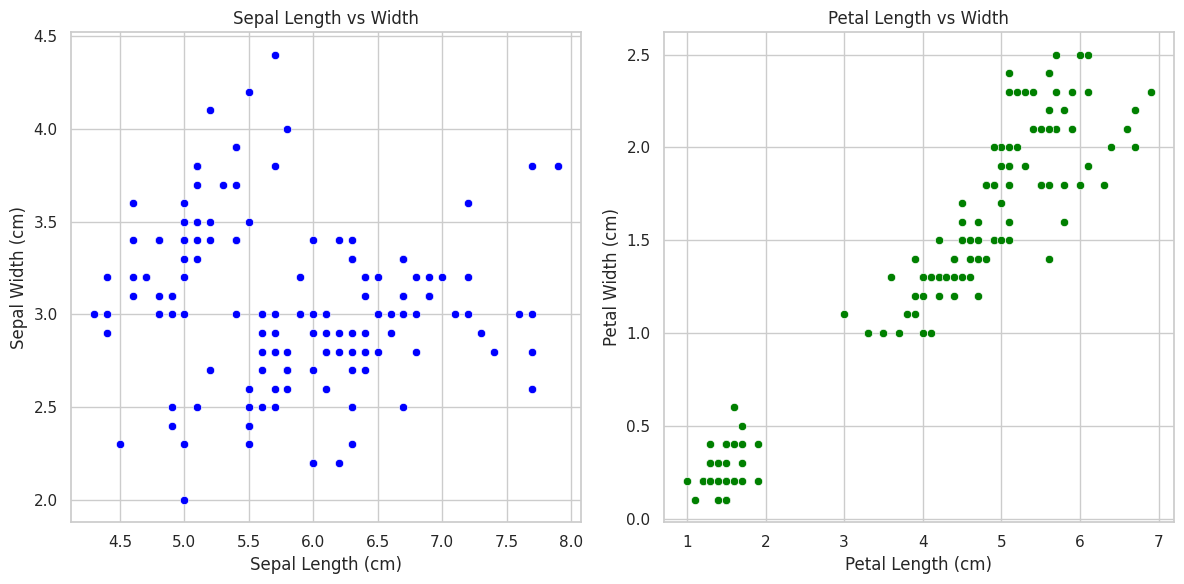

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376
MYSQL_DB = "defaultdb"
MYSQL_USER = "avnadmin"
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"

# Buat koneksi dengan SQLAlchemy
# Berikan parameter ssl sebagai dictionary untuk PyMySQL
db_url = f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"
# Tambahkan connect_args untuk parameter SSL
engine = create_engine(db_url, connect_args={'ssl': {'ssl': {}}})


# Ambil data
query = "SELECT sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm FROM irissql;"
df = pd.read_sql(query, engine)

# Visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="sepalLengthCm", y="sepalWidthCm", color='blue')
plt.title("Sepal Length vs Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="petalLengthCm", y="petalWidthCm", color='green')
plt.title("Petal Length vs Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()